# Data Exploration 



Download the flights.zip dataset from Canvas and the Ship data  


In [63]:
# Numpy is a library for working with Arrays
import numpy as np
print ("Your numpy version: %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("Your SciPy version: %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Your Pandas version: %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Your Mapltolib version: %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Your Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Your numpy version: 1.21.5 (need at least 1.7.1)
Your SciPy version:  1.9.1 (need at least 0.12.0)
Your Pandas version:  1.4.4 (need at least 0.11.0)
Your Mapltolib version:  3.5.2 (need at least 1.2.1)
Your Scikit-Learn version:  1.0.2 (need at least 0.13.1)


## Instructions: 
 

**(1) Data Exploration** 

Perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization.

This data set uses the NYCFlights13 dataset. (flights.zip).


**(2) Cross Validation**

The goal is to understand cross validation, apply it with a simple linear regression and k-Nearest Neighbors problem, and then compare the methods.  

# Part I

In [64]:
import matplotlib.pyplot as plt


In [65]:
flights_df= pd.read_csv('flights.csv')

In [66]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [67]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()
print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.head(10)
flights_df.tail(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
336766,336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0
336767,336768,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0
336768,336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0
336769,336770,2013,9,30,2349.0,-10.0,325.0,-25.0,B6,N516JB,745,JFK,PSE,196.0,1617,23.0,49.0
336770,336771,2013,9,30,NaN,NaN,NaN,NaN,EV,N740EV,5274,LGA,BNA,NaN,764,NaN,NaN
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


#### Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc.

* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.


Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [68]:
# Your code here
flights_df1=flights_df[ flights_df.dest=='SEA']

flights_NYC_SEA= flights_df[flights_df['origin'].isin(['JFK','EWR','LGA']) & (flights_df['dest']=='SEA' ) & (flights_df['year']==2013)]
len(flights_NYC_SEA)
flights_NYC_SEA

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
78,79,2013,1,1,724.0,-1.0,1020.0,-10.0,AS,N594AS,11,EWR,SEA,338.0,2402,7.0,24.0
93,94,2013,1,1,743.0,13.0,1059.0,3.0,DL,N3760C,495,JFK,SEA,349.0,2422,7.0,43.0
165,166,2013,1,1,857.0,6.0,1157.0,-25.0,UA,N45440,1670,EWR,SEA,343.0,2402,8.0,57.0
401,402,2013,1,1,1418.0,-1.0,1726.0,-6.0,UA,N37464,16,EWR,SEA,348.0,2402,14.0,18.0
404,405,2013,1,1,1421.0,26.0,1735.0,26.0,B6,N503JB,83,JFK,SEA,349.0,2422,14.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336585,336586,2013,9,30,1829.0,-1.0,2152.0,10.0,DL,N707TW,1543,JFK,SEA,355.0,2422,18.0,29.0
336586,336587,2013,9,30,1829.0,-6.0,2153.0,5.0,AS,N528AS,5,EWR,SEA,341.0,2402,18.0,29.0
336587,336588,2013,9,30,1830.0,30.0,2138.0,35.0,B6,N561JB,263,JFK,SEA,350.0,2422,18.0,30.0
336652,336653,2013,9,30,1934.0,4.0,2236.0,-14.0,AA,N3EXAA,235,JFK,SEA,340.0,2422,19.0,34.0


  The number of flights from NYC airports to Seattle in 2013 are 3923.

(b) How many airlines fly from NYC to Seattle?

In [69]:
# Your code here
print(flights_NYC_SEA['carrier'].unique())
print(len(flights_NYC_SEA['carrier'].unique()))


['AS' 'DL' 'UA' 'B6' 'AA']
5


 There are 5 airlines that fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [70]:
# Your code here

print(len(flights_NYC_SEA['tailnum'].unique()))

936


 The number of unique air planes from NYC to Seattle are 936

(d) What is the average arrival delay for flights from NC to Seattle?

In [71]:
# Your code here

#using calculation
sum_arr_delay=flights_NYC_SEA['arr_delay'].sum()
tot_flights=len(flights_NYC_SEA)
avg_arr_delay=sum_arr_delay/tot_flights
print(avg_arr_delay)


#using mean function
avg_arr_delay2=flights_NYC_SEA['arr_delay'].mean()
print(avg_arr_delay2)

-1.088452714759113
-1.0990990990990992


The average delay for flights from NYC to Seattle is -1.099, it means that flights arrived 1.099 mins before their scheduled time.

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [72]:
# Your code here

#1
prop_indiv=flights_NYC_SEA.groupby('origin')['origin'].count().to_frame().rename(columns={'origin':'count'})
prop_indiv
prop_indiv['Proportion']=prop_indiv.apply(lambda x:x/x.sum()*100)
print(prop_indiv)



#2
prop = pd.DataFrame(flights_NYC_SEA.groupby('origin').size())
prop.columns=['count']
prop['Proportion']=prop['count']/prop['count'].sum()*100
prop

        count  Proportion
origin                   
EWR      1831   46.673464
JFK      2092   53.326536


,count,Proportion
origin,,
EWR,1831,46.673464
JFK,2092,53.326536


 The proportion of flights to Seattle from each NYC airport are as follows
 1) EWR TO SEA : 46.67%
 2) JFK TO SEA : 53.32%
 3) LGA TO SEA : 0%


Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [73]:
# Your code here
flights_df['Date']=pd.to_datetime(flights_df[['year','month','day']])
flights_df

avg_by_date=pd.DataFrame(flights_df.groupby('Date').mean())
avg_by_date

avg_dep_delay=avg_by_date.nlargest(1,'dep_delay')['dep_delay']
print("Average departure delay: ")
print(avg_dep_delay)

avg_arr_delay=avg_by_date.nlargest(1,'arr_delay')['arr_delay']
print("\nAverage arrival delay: ")
print(avg_arr_delay)

Average departure delay: 
Date
2013-03-08    83.536921
Name: dep_delay, dtype: float64

Average arrival delay: 
Date
2013-03-08    85.862155
Name: arr_delay, dtype: float64


 The date with largest average departure delay is 2013-03-08 i.e. March 8, 2013 and delay is of 83.53 mins
 The date with largest average arrival delay is 2013-03-08 i.e. March 8, 2013 and delay is of 85.86 mins

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [74]:
# Your code here

#a)
#if you dislike delayed flights, then the day with largest average departure delay
avg_dep_del=avg_by_date.sort_values(['dep_delay'],ascending=False)['dep_delay'].head(1)
print("Worst day to fly according to largest average departure delay")
print(avg_dep_del) 


#b)
#subset data of flights that had a departure delay
dep_delay=flights_df[flights_df['dep_delay']>0]
#maximum departure delay in a day
max_dep_delay = dep_delay.sort_values(by='dep_delay', ascending=False).rename(columns={'Unnamed: 0':'Date'}).head(1)
print("\nWorst day to fly out of NYC according to maximum departure delay is")
print(max_dep_delay)


Worst day to fly according to largest average departure delay
Date
2013-03-08    83.536921
Name: dep_delay, dtype: float64

Worst day to fly out of NYC according to maximum departure delay is
      Date  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
7072  7073  2013      1    9     641.0     1301.0    1242.0     1272.0   

     carrier tailnum  flight origin dest  air_time  distance  hour  minute  \
7072      HA  N384HA      51    JFK  HNL     640.0      4983   6.0    41.0   

           Date  
7072 2013-01-09  


 1) The worst day to fly out of NYC in 2013 if you disliked delayed flights based on different factors are
 a) based on the day with the largest average departure delay for all flights was 2013-03-08 with departure delay of 83.53mins
 b) based on maximum departure delay was 2013-01-09 as the flight had a departure delay of 1301 minutes.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

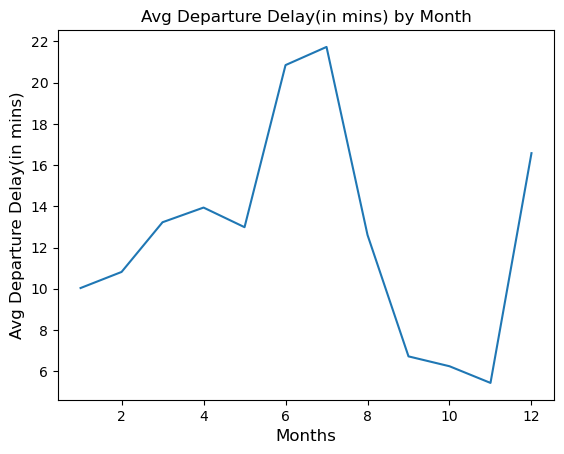

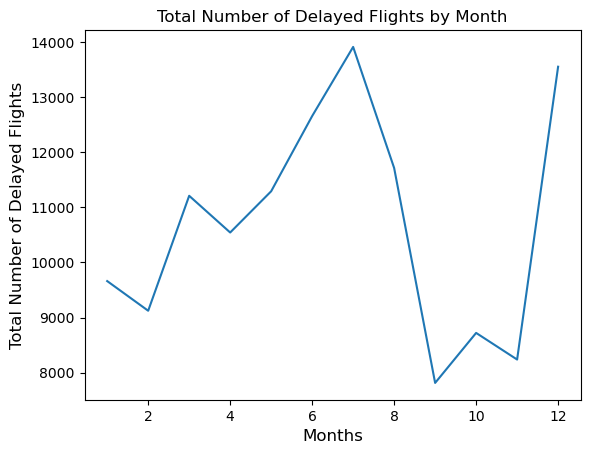

In [75]:
# Your code here

import matplotlib.pyplot as plt
#Graph of total number of delayed flights in a month

plt.plot(flights_df.groupby('month')['dep_delay'].mean())
plt.xlabel('Months', size = 12)
plt.ylabel('Avg Departure Delay(in mins)', size = 12)
plt.title('Avg Departure Delay(in mins) by Month')
plt.show()

plt.plot(dep_delay.groupby('month').count()['dep_delay'])
plt.xlabel('Months', size = 12)
plt.ylabel('Total Number of Delayed Flights', size = 12)
plt.title('Total Number of Delayed Flights by Month')
plt.show()


 To check seasonal pattern, I plotted graphs for Average departure delay over months & Total departure delay over months.
 For Average departure delay the peak months where Avergae departure delay is maximum are June to August with peak in July and December, this is explanatory as these months are holiday seasons.
 From the Total departure delay over months, the peaks in the month of July and December show that the total departure delay has been maximum in these months which again can be explained by holiday season when people travel more.

(d) On average, how do departure delays vary over the course of a day?

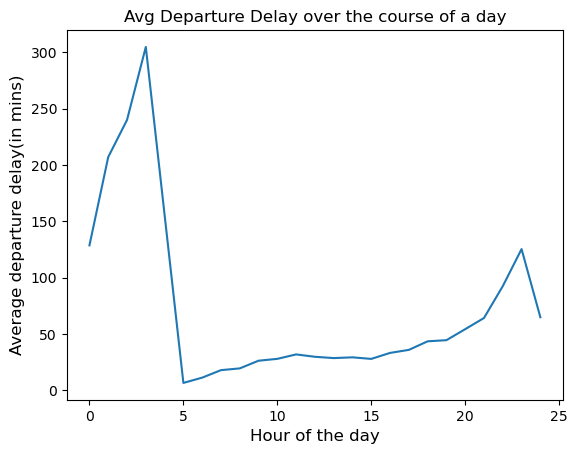

In [109]:
# Your code here
dep_delay.groupby('hour')['dep_delay'].mean()
plt.plot(dep_delay.groupby('hour')['dep_delay'].mean())
plt.xlabel('Hour of the day', size = 12)
plt.ylabel('Average departure delay(in mins)', size = 12)
plt.title('Avg Departure Delay over the course of a day')
plt.show()

flight_count=dep_delay.groupby('hour').count().rename(columns={'Unnamed: 0':'Count'})


 From the above plotted graph of average departure delay over the course of the day per hour, it is evident that the maximum delays occur around the 3rd hour of the day and 22nd hour of the day i.e. between 10pm and 3/4 am. 


    Which flight departing NYC in 2013 flew the fastest?

In [110]:
# Your code here

#calculating speed
flights_df['speed']=flights_df['distance']/(flights_df['air_time']/60)

fastest_flights_df=flights_df[flights_df['speed'].notna()]
fastest_flights_df.sort_values('speed',ascending=False).head(1)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,origin,dest,air_time,distance,hour,minute,Date,speed,flight_comb_det,day_of_week
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,...,LGA,ATL,65.0,762,17.0,9.0,2013-05-25,703.384615,DL 1499 ATL,5


 The flight departing from LGA airport to ATL with tailnum N666DN had flew the fastest with speed of 703.38 miles per hour


Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [78]:
# Your code here

#check for unique dates
date=pd.DataFrame(flights_df.Date.unique()).rename(columns={0:'Date'})
date.count()

flights_df['flight_comb_det'] = flights_df[['carrier', 'flight', 'dest']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

flights_new=flights_df.groupby(['flight_comb_det','Date']).count()
flights_new.rename(columns={'Unnamed: 0':'Count'})


flights_new=flights_new.groupby('flight_comb_det').count().rename(columns={'Unnamed: 0':'Count'}).reset_index()
flights_new

allday_flights=flights_new[flights_new['Count']==365]['flight_comb_det']
print('The number of flights which happen everyday are:')
print(allday_flights.size)
print("The flights that happen everyday are:")
print(allday_flights)

destinations = set([x[-3:] for x in allday_flights.astype(str)])
print("The destination to where the flights fly to are:")
destinations

flights_df.head(10)

The number of flights which happen everyday are:
18
The flights that happen everyday are:
790       AA 119 LAX
801      AA 1357 SJU
813      AA 1611 MIA
842       AA 181 LAX
941        AA 59 SFO
1130     B6 1783 MCO
1178      B6 219 CLT
1241      B6 359 BUR
1246      B6 371 FLL
1272      B6 431 SRQ
1362      B6 703 SJU
1735     DL 2159 MCO
1805     DL 2391 TPA
4631     EV 5712 IAD
6561       UA 15 HNL
10605     VX 251 LAS
10609     VX 407 LAX
10613     VX 413 LAX
Name: flight_comb_det, dtype: object
The destination to where the flights fly to are:


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,Date,speed,flight_comb_det
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01,370.044053,UA 1545 IAH
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01,374.273128,UA 1714 IAH
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01,408.375000,AA 1141 MIA
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01,516.721311,B6 725 BQN
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01,394.137931,DL 461 ATL
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0,2013-01-01,287.600000,UA 1696 ORD
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0,2013-01-01,404.430380,B6 507 FLL
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0,2013-01-01,259.245283,EV 5708 IAD
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0,2013-01-01,404.571429,B6 79 MCO
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0,2013-01-01,318.695652,AA 301 ORD


The flights that happen every day are 
1)AA 119 LAX
2)AA 1357 SJU
3)AA 1611 MIA
4)AA 181 LAX
5)AA 59 SFO
6)B6 1783 MCO
7)B6 219 CLT
8)B6 359 BUR
9)B6 371 FLL
10)B6 431 SRQ
11)B6 703 SJU
12)DL 2159 MCO
13)DL 2391 TPA
14)EV 5712 IAD
15)UA 15 HNL
16)VX 251 LAS
17)VX 407 LAX
18)VX 413 LAX

The destination where the flights fly to are 
{'BUR',
 'CLT',
 'FLL',
 'HNL',
 'IAD',
 'LAS',
 'LAX',
 'MCO',
 'MIA',
 'SFO',
 'SJU',
 'SRQ',
 'TPA'}


Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


   day_of_week  arr_delay
0            0   9.653739
1            1   5.388526
2            2   7.051119
3            3  11.740819
4            4   9.070120
5            5  -1.448828
6            6   4.820024


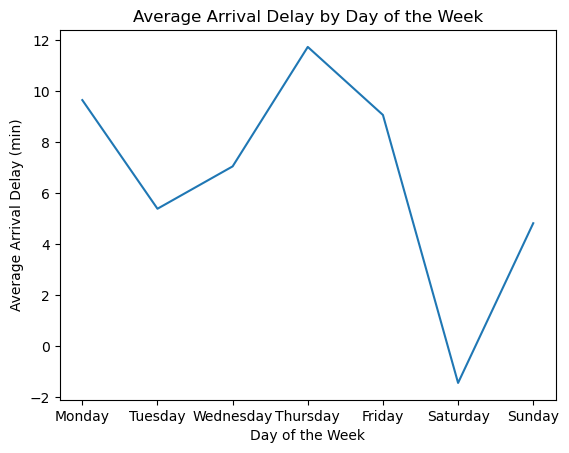

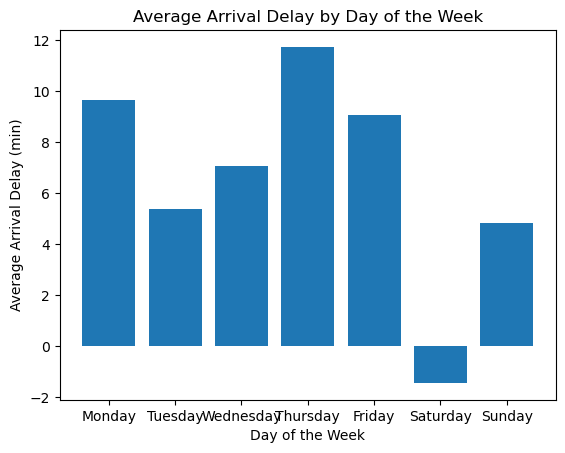

In [111]:
# Your code here

# Research question : How does the average arrival delay vary by day of the week in the dataset?



flights_df['day_of_week'] = pd.to_datetime(flights_df['Date']).dt.dayofweek
flights_df_grouped = flights_df.groupby('day_of_week')['arr_delay'].mean().reset_index()
print(flights_df_grouped)
flights_df_grouped.day_of_week = flights_df_grouped.day_of_week.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
plt.plot(flights_df_grouped['day_of_week'], flights_df_grouped['arr_delay'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay (min)')
plt.title('Average Arrival Delay by Day of the Week')
plt.show()


plt.bar(flights_df_grouped['day_of_week'], flights_df_grouped['arr_delay'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay (min)')
plt.title('Average Arrival Delay by Day of the Week')
plt.show()

 -- Enter your discussion here --
 
 Research question :How does the day of the week affect the arrival delay?
 
To explore this we have used a line chart and a bar chart.
The line chart visualization will show the average arrival delay for each day of the week. It shows that the average arrival delay is higher on Thursday(approx 11 mins), Monday(approx 9 mins) and Friday(approx 9 mins as well).
The bar chart helps us to compare the delay time between these days. Saturdays have a negative arrival delay which means that flights arrive earlier than the designated time. There can be several reasons as to why these days have higher arrival delays (due to traffic, weather conditions or other factors). The difference between average arrival delay is maximum from Friday to Saturday. This information can be useful for airports and airlines to schedule resources and planning for these days.



What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

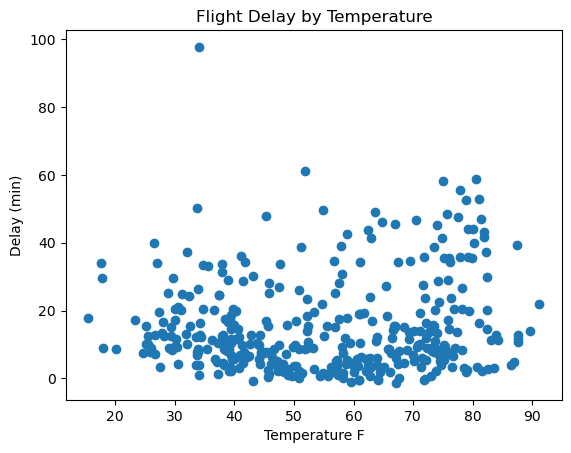

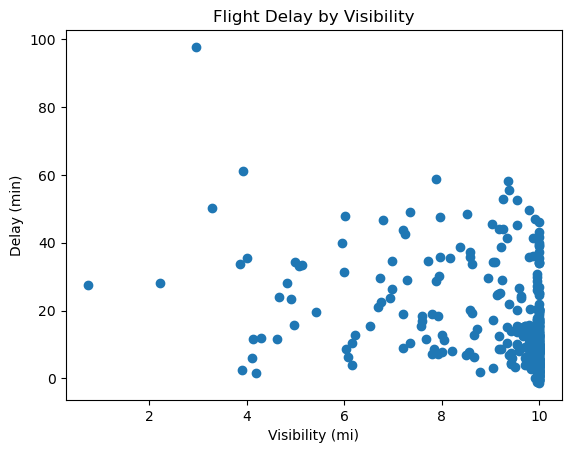

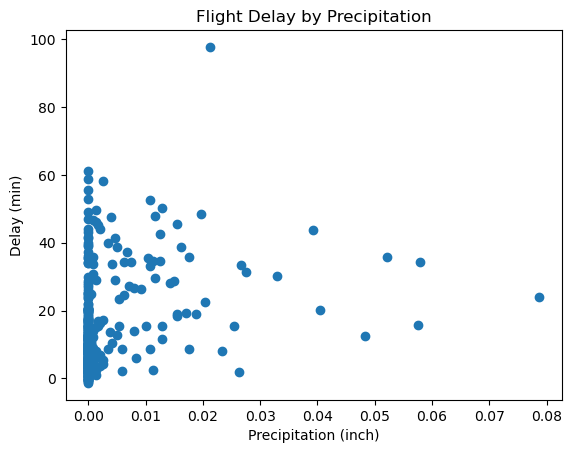

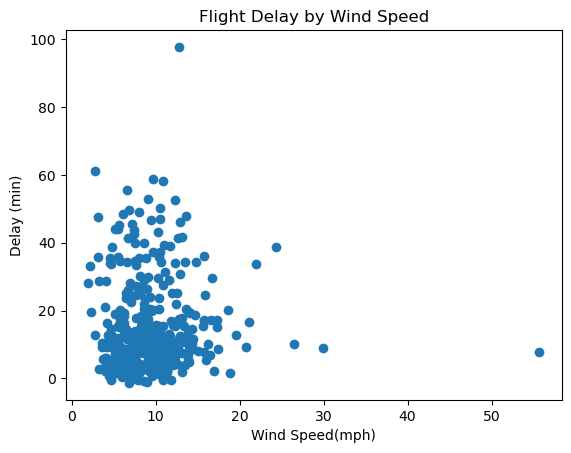

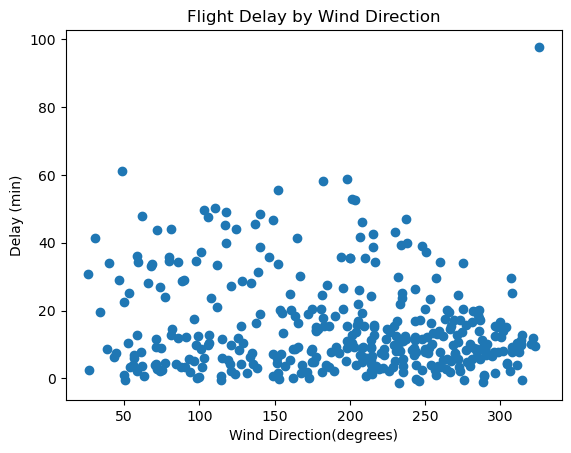

In [119]:
# Your code here

weather_df=pd.read_csv('weather.csv')
weather_df.head(10)

merged = pd.merge(flights_df,weather_df,on= ['year','month','day','origin'])
merged.head(10)

merged=merged.groupby(['year','month','day','origin']).mean()
merged.head(10)

merged["delay_status"] = ["delayed" if x > 0 else "not delayed" for x in merged["arr_delay"]]
merged.head(10)



#flight delays by temperature
delayed=merged[merged['delay_status']=="delayed"]
not_delayed=merged[merged['delay_status']=="not delayed"]
delayed.head(10)


plt.scatter(merged["temp"], merged["dep_delay"])
plt.xlabel("Temperature F")
plt.ylabel("Delay (min)")
plt.title("Flight Delay by Temperature")
plt.show()



#flight delays by visibility 
plt.scatter(merged["visib"], merged["dep_delay"])
plt.xlabel("Visibility (mi)")
plt.ylabel("Delay (min)")
plt.title("Flight Delay by Visibility")
plt.show()


#flight delays by precipitation
plt.scatter(merged["precip"], merged["dep_delay"])
plt.xlabel("Precipitation (inch)")
plt.ylabel("Delay (min)")
plt.title("Flight Delay by Precipitation")
plt.show()


#flight delays by windspeed
plt.scatter(merged["wind_speed"], merged["dep_delay"])
plt.xlabel("Wind Speed(mph)")
plt.ylabel("Delay (min)")
plt.title("Flight Delay by Wind Speed")
plt.show()

#flight delays by wind direction
plt.scatter(merged["wind_dir"], merged["dep_delay"])
plt.xlabel("Wind Direction(degrees)")
plt.ylabel("Delay (min)")
plt.title("Flight Delay by Wind Direction")
plt.show()

#Each point on the plot represents a single flight and the x-axis represents the temperature in degrees Fahrenheit
#and the y-axis represents the delay in minutes.
#all graphs do not as such show a strong association , there is no clear relationship between visibility and precipitation
#with flight delays
#temperature does not show a strong association as well, flights appear to be delayed at lower and higher temperature as well.
#A lower windspeed in the range of 5-15 mph causes a delay ranging upto 20 mins for most flights
#Wind direction as well has weak correlation , higher the wind direction the delay for flights is around 10-20 mins



# Part II

Download the libraries and Ship data


In [81]:
import seaborn as sns
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.neighbors import KNeighborsRegressor # for kNN
from sklearn import preprocessing # for scaling the data
from sklearn.model_selection import KFold, cross_validate # for Cross-validation
from sklearn.metrics import r2_score, mean_squared_error
np.random.seed(371)

#### Read the data


In [82]:
df = pd.read_csv('./lab1_data.csv')
df.head()


,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,694,5.94,3.55,42.64,36
1,Quest,Azamara,6,30.277,694,5.94,3.55,42.64,36
2,Celebration,Carnival,26,47.262,1486,7.22,7.43,31.80,67
3,Conquest,Carnival,11,110.000,2974,9.53,14.88,36.99,191
4,Destiny,Carnival,17,101.353,2642,8.92,13.21,38.36,100


#### Explore the data


In [83]:
# pick some columns for our practice
cols = ["Tonnage", "length", "cabins", "crew", "passengers"]

df_selected = df[cols]

df_selected.describe()

,Tonnage,length,cabins,crew,passengers
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,71.284671,8.130633,8.830000,78.012658,1845.740506
std,37.229540,1.793474,4.471417,35.020283,967.709478
min,2.329000,2.790000,0.330000,6.000000,66.000000
25%,46.013000,7.100000,6.132500,55.250000,1253.500000
50%,71.899000,8.555000,9.570000,81.500000,1950.000000
75%,90.772500,9.510000,10.885000,100.000000,2484.500000
max,220.000000,11.820000,27.000000,210.000000,5400.000000


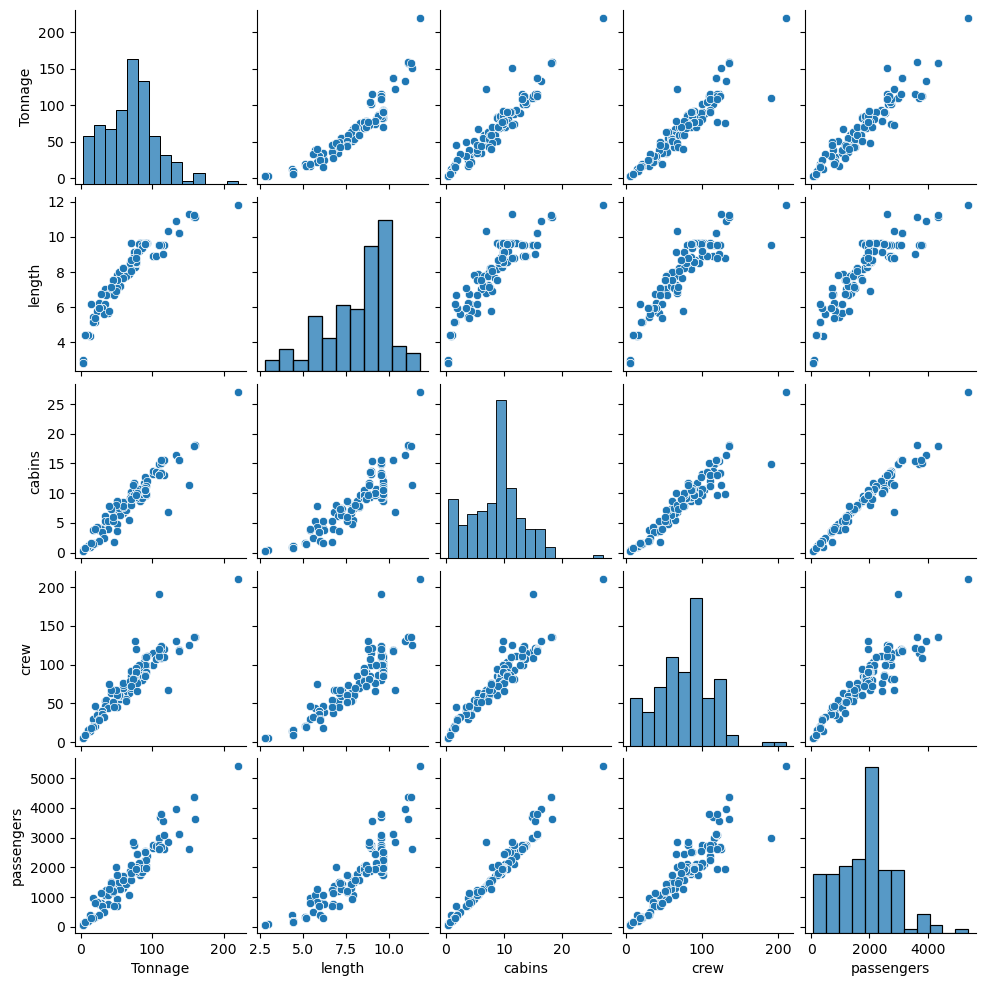

In [84]:
sns.pairplot(df_selected, height=2.0)

## Observations from this pair plot? 



In this case the pairplot depicts the relationship between columns Toonage, length, cabins, crew and passengers.The diagonal of the pairplot shows histograms of each variable and allow us to see the distribution of single variable whereas the scatterplots on either side show the relationship between two variables.
All scatterplots which show the relation between two variables approximately resemble a straight line and have a positive relation which says that one variable approximately increases at the same rate as the other variable increases by one unit.
We can say that tonnage and length , passenger and length have slightly weak linear relationship 
passenger and cabin have a strong linear relationship.

## Prepare the data using cross validation


In [85]:
x_cols = ["Tonnage", "length", "cabins", "crew"]
y_col = "passengers"

X_full = df_selected[x_cols]
y_full = df_selected[y_col]

In [86]:
cv_split = KFold(n_splits=5, shuffle=True, random_state=371) # random state ensures reproducable output across multiple function calls

In [87]:
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    print(X_train.shape, X_test.shape)

(126, 4) (32, 4)
(126, 4) (32, 4)
(126, 4) (32, 4)
(127, 4) (31, 4)
(127, 4) (31, 4)


## Compare LR and KNN (k=3)


In [88]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)


## Example of training linear regression model


In [89]:
# 2 types of error
r2_lr_list = []
mse_lr_list = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # linear regression
    m_lr = lr.fit(X_train, y_train)
    y_pred = m_lr.predict(X_test)
    
    # R^2
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    r2_lr_list.append(r2_lr)
    
    # mean squared error
    mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_lr_list.append(mse_lr)

print("average R2 score for linear regression:", np.mean(r2_lr_list))
print("average MSE linear regression:", np.mean(mse_lr_list))

average R2 score for linear regression: 0.9480419620768963
average MSE linear regression: 41375.7696648743


##  Following the example, training a KNN model (K=3). 


In [90]:
r2_knn_list = []
mse_knn_list = []

# Your code here
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # linear regression
    m_knn = knn.fit(X_train, y_train)
    y_pred = m_knn.predict(X_test)
    
    # R^2
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    r2_knn_list.append(r2_knn)
    
    # mean squared error
    mse_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_knn_list.append(mse_knn)

print("average R2 score for knn regression:", np.mean(r2_knn_list))
print("average MSE knn regression:", np.mean(mse_knn_list))

print("\nAverage R2(r squared) tells us about the goodness of the fit of the model, it tells how well the regression model \
explains the observed data. Average MSE indicates how close a regression line is to set of data points hence large MSE means \
data points are dispresed widely around mean so lower mse is preferable as lower mse means smaller error and better estimator \
The model with better performance should have r squared value closer to 1 and smaller MSE hence based on this the linear \
regression model performs better")

average R2 score for knn regression: 0.884477051324499
average MSE knn regression: 104453.68064516128

Average R2(r squared) tells us about the goodness of the fit of the model, it tells how well the regression model explains the observed data. Average MSE indicates how close a regression line is to set of data points hence large MSE means data points are dispresed widely around mean so lower mse is preferable as lower mse means smaller error and better estimator The model with better performance should have r squared value closer to 1 and smaller MSE hence based on this the linear regression model performs better


## A short-cut to do cross-validation

List of available metrics found in scikit learn documentation: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [91]:
metrics = ('r2', 'neg_mean_squared_error')

results_lr = cross_validate(estimator=lr, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
results_knn = cross_validate(estimator=knn, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)

In [92]:
results_lr

{'fit_time': array([0.00676537, 0.00526428, 0.00433993, 0.00797939, 0.00868845]),
 'score_time': array([0.00221419, 0.00100064, 0.00199866, 0.00102162, 0.00311804]),
 'test_r2': array([0.97581596, 0.9508146 , 0.96105864, 0.87857793, 0.97394268]),
 'train_r2': array([0.95334727, 0.96172013, 0.96041017, 0.97190647, 0.95634131]),
 'test_neg_mean_squared_error': array([-33643.29805604, -31760.63421478, -33538.33128831, -86406.84704642,
        -21529.73771883]),
 'train_neg_mean_squared_error': array([-37477.03868869, -38280.1317768 , -37520.51317443, -27045.66461286,
        -40418.56065386])}

In [93]:
print("average R2 score for LR:", results_lr["test_r2"].mean())
print("average R2 score KNN:", results_knn["test_r2"].mean())

print("average MSE linear regression:", results_lr["test_neg_mean_squared_error"].mean())
print("average MSE for KNN:", results_knn["test_neg_mean_squared_error"].mean())

average R2 score for LR: 0.9480419620768963
average R2 score KNN: 0.884477051324499
average MSE linear regression: -41375.7696648743
average MSE for KNN: -104453.68064516128


In [94]:
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_results = df_results.append({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, ignore_index=True)

df_results

C:\Users\minal\AppData\Local\Temp\ipykernel_13004\2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
C:\Users\minal\AppData\Local\Temp\ipykernel_13004\2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
C:\Users\minal\AppData\Local\Temp\ipykernel_13004\2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
C:\Users\minal\AppData\Local\Temp\ipykernel_13004\2703812718.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'k': k,
C:\Users\minal\AppData\Local\Tem

,k,train_error,test_error
0,1.0,0.707662,97398.440927
1,2.0,28912.104934,96073.377369
2,3.0,49547.528087,104453.680645
3,4.0,62332.739825,113585.690008
4,5.0,72863.877286,118126.571411
5,6.0,80880.750423,121470.790177
6,7.0,84954.388989,118869.699650
7,8.0,88829.892194,123161.196072
8,9.0,90639.171359,116838.024111
9,10.0,94161.924545,114674.361974


## In the previous cell, you likely saw a deprecation error. Fix that error and rewrite the code below so that no error occurs. 

In [95]:
## New code here
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_addrow = pd.DataFrame({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1},index=[0])
    df_results = pd.concat([df_results,df_addrow],ignore_index=True)

df_results

,k,train_error,test_error
0,1.0,0.707662,97398.440927
1,2.0,28912.104934,96073.377369
2,3.0,49547.528087,104453.680645
3,4.0,62332.739825,113585.690008
4,5.0,72863.877286,118126.571411
5,6.0,80880.750423,121470.790177
6,7.0,84954.388989,118869.699650
7,8.0,88829.892194,123161.196072
8,9.0,90639.171359,116838.024111
9,10.0,94161.924545,114674.361974


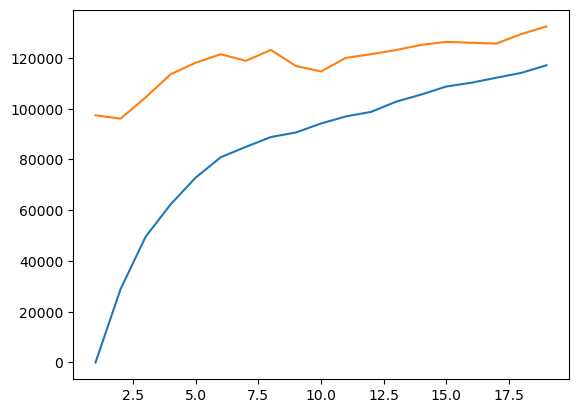

In [96]:
plt.plot(df_results['k'], df_results['train_error'])
plt.plot(df_results['k'], df_results['test_error'])


In [97]:
scaler = preprocessing.StandardScaler()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

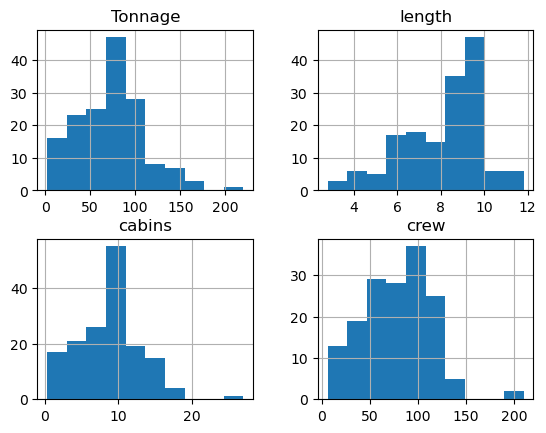

In [98]:
X_full.hist()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

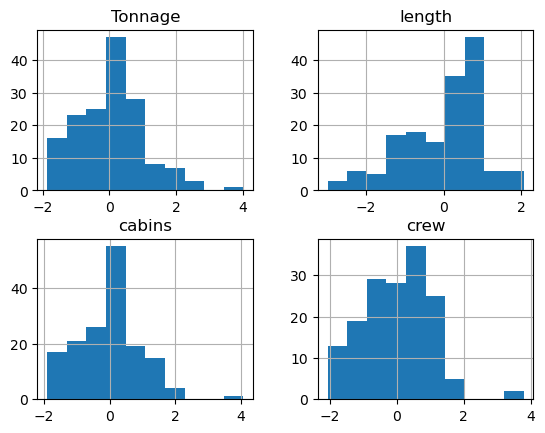

In [99]:
X_full_transform = scaler.fit(X_full).transform(X_full)
# same results:
# X_full_transform = scaler.fit_transform(X_full)

X_full_transform = pd.DataFrame(X_full_transform, columns=X_full.columns)
X_full_transform.hist()

In [100]:
r2_lr_list_scale = []
mse_lr_list_scale = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_lr = lr.fit(X_train_standard, y_train)
    y_pred = m_lr.predict(X_test_standard)
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_lr_list_scale.append(r2_lr)
    mse_lr_list_scale.append(mse_le)
print("With scaling")
print("average R2 score:", np.mean(r2_lr_list_scale))
print("average MSE:", np.mean(mse_lr_list_scale))

print("Without scaling")
print("average R2 score:", np.mean(r2_lr_list))
print("average MSE:", np.mean(mse_lr_list))

With scaling
average R2 score: 0.9480419620768963
average MSE: 41375.76966487426
Without scaling
average R2 score: 0.9480419620768963
average MSE: 41375.7696648743


## How does the results compared to the previous linear regression model without scaling? Why?



In this case scaling did not significantly impact our linear regression model. The average r2 score remained the same before and
after scaling and the MSE reduced by a small amount. For a model to have better performance we said above that R2 score should be close to 1 and MSE should be low. The model had good R2 and MSE before scaling and while the amount of improvement after scaling is not huge yet scaling lowered the average MSE, slightly improving the model. The reason can be that the features are already on a similar scale, being a liner model the relationship between dependent and independent variables is linear and model is concerned with relative differences hence the model may not be senstive to the scale of features or is already at best performance.


##  Following the example, train a KNN (K=3) model with the scaling.


In [101]:
r2_knn_list_scale = []
mse_knn_list_scale = []

# Your code here
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_knn = knn.fit(X_train_standard, y_train)
    y_pred = m_knn.predict(X_test_standard)
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    mse_le = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_knn_list_scale.append(r2_knn)
    mse_knn_list_scale.append(mse_le)
print("With scaling")
print("average R2 score:", np.mean(r2_knn_list_scale))
print("average MSE:", np.mean(mse_knn_list_scale))

print("Without scaling")
print("average R2 score:", np.mean(r2_knn_list))
print("average MSE:", np.mean(mse_knn_list))

With scaling
average R2 score: 0.9288492935982386
average MSE: 69673.52674731184
Without scaling
average R2 score: 0.884477051324499
average MSE: 104453.68064516128


##  How does the results compared to the previous KNN model without scaling? Why?
In the previous model without scaling we determined that for a model to perform better it should have larger r square score or
r squared value closer to 1 and lower MSE value. After scaling comparing the R2 score and MSE with the KNN model without scaling 
we can see that average R2 score has increased and is closer to 1 and average MSE has decreased, hence we can say through these 
metrics that the model performance has improved after scaling.
KNN is based on distance (i.e. uses the distance between input features to identify the k-nearest neighbors)and high magnitude 
of observation can affect the distance between two points, as we do not want this to introduce bias/affect our final results
with help of scaling we bring all variables to the same scale and will ensure that all the features
are taken into account with equal importance.